In [18]:
'''
Assignment 2: Bank Marketing – Term Deposit Prediction
Dataset: Bank Marketing
Link: https://raw.githubusercontent.com/selva86/datasets/master/BankMarketing.csv
Task:
 Predict if a customer will subscribe to a term deposit.
 Handle missing values.
 Encode categorical variables using LabelEncoder.
 Apply StandardScaler.
 Train logistic regression & calculate Confusion Matrix + F1-score.

'''

'\nAssignment 2: Bank Marketing – Term Deposit Prediction\nDataset: Bank Marketing\nLink: https://raw.githubusercontent.com/selva86/datasets/master/BankMarketing.csv\nTask:\n\uf0b7 Predict if a customer will subscribe to a term deposit.\n\uf0b7 Handle missing values.\n\uf0b7 Encode categorical variables using LabelEncoder.\n\uf0b7 Apply StandardScaler.\n\uf0b7 Train logistic regression & calculate Confusion Matrix + F1-score.\n\n'

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('bank-additional-full.csv',sep=';')
print("Number of rows:", df.shape[0], "Number of columns:", df.shape[1])   ## load the dataset

Number of rows: 41188 Number of columns: 21


In [21]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [81]:
(df['y']=='no').sum()  ## 89

36548

In [82]:
(df['y']=='yes').sum()  ##11

4640

In [22]:
df.isnull().sum()  ## check null value

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [23]:
df.columns  ## show the columns of the dataset

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [24]:
df1 = df.drop(['duration'],axis=1)  ## not important for this model .So we drop this column

In [25]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
df1['pdays'].unique()  ## continuous data

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [27]:
df1['campaign'].unique()  ## continuous data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [28]:
df1['previous'].unique() ## discrete data

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [29]:
df1['emp.var.rate'].unique()  ## continuous data

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [30]:
df1['cons.price.idx'].unique()## continuous data

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [31]:
df1['cons.conf.idx'].unique()  ## continuous data

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [32]:
df1['nr.employed'].unique()  ## continuous data

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [33]:
df1['euribor3m'].unique()  ## continuous data

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [34]:
df3 = df1.drop(['y'],axis=1)

In [35]:
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder

In [36]:
## label Encoder --> job , marital , default , housing , loan , contact , poutcome ,y

In [37]:
## ordinal Encoder --> education , month ,day_of_week

In [38]:
le_j = LabelEncoder()  ## create LabelEncoder object for job column
le_m = LabelEncoder()  ## create LabelEncoder object for marital column
le_d = LabelEncoder()  ## create LabelEncoder object for default column
le_h = LabelEncoder()  ## create LabelEncoder object for housing column
le_l = LabelEncoder()  ## create LabelEncoder object for loan column
le_c = LabelEncoder()  ## create LabelEncoder object for contact column
le_p = LabelEncoder()  ## create LabelEncoder object for poutcome column
le_y = LabelEncoder()  ## create LabelEncoder object for y column

In [39]:
## convert categorical to numerical of labelling data

df1['job'] = le_j.fit_transform(df1['job'])
df1['marital'] = le_m.fit_transform(df1['marital'])
df1['default'] = le_d.fit_transform(df1['default'])
df1['housing'] = le_h.fit_transform(df1['housing'])
df1['loan'] = le_l.fit_transform(df1['loan'])
df1['contact'] = le_c.fit_transform(df1['contact'])
df1['poutcome'] = le_p.fit_transform(df1['poutcome'])
df1['y'] = le_y.fit_transform(df1['y'])

In [40]:
oe_e = OrdinalEncoder(categories=[['illiterate','basic.4y','basic.6y','basic.9y','high.school','university.degree','professional.course','unknown']])
oe_m = OrdinalEncoder(categories=[['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']])
oe_d = OrdinalEncoder(categories=[['mon','tue','wed','thu', 'fri']])

In [41]:
df1['education'].unique()  ## check unique value of this column 

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [42]:
df1['month'].unique()   ## check unique value of this column 

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [43]:
df1['day_of_week'].unique()   ## check unique value of this column 

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [44]:
## fit on ordinal encoder and transform 

df1['education'] = oe_e.fit_transform(df1[['education']])
df1['month'] = oe_m.fit_transform(df1[['month']])
df1['day_of_week'] = oe_d.fit_transform(df1[['day_of_week']])

In [45]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,1.0,0,0,0,1,2.0,0.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,4.0,1,0,0,1,2.0,0.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,4.0,0,2,0,1,2.0,0.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2.0,0,0,0,1,2.0,0.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,4.0,0,0,2,1,2.0,0.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [46]:
cols = ['age','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign','pdays']

In [47]:
df1[cols].corr()  ## correlation of this columns 

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays
age,1.000000,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.004594,-0.034369
emp.var.rate,-0.000371,1.000000,0.775334,0.196041,0.972245,0.906970,0.150754,0.271004
cons.price.idx,0.000857,0.775334,1.000000,0.058986,0.688230,0.522034,0.127836,0.078889
cons.conf.idx,0.129372,0.196041,0.058986,1.000000,0.277686,0.100513,-0.013733,-0.091342
euribor3m,0.010767,0.972245,0.688230,0.277686,1.000000,0.945154,0.135133,0.296899
nr.employed,-0.017725,0.906970,0.522034,0.100513,0.945154,1.000000,0.144095,0.372605
campaign,0.004594,0.150754,0.127836,-0.013733,0.135133,0.144095,1.000000,0.052584
pdays,-0.034369,0.271004,0.078889,-0.091342,0.296899,0.372605,0.052584,1.000000


In [98]:
## drop this (euribor3m , nr.employed) column for high correlation

In [48]:
df2 = df1.drop(['euribor3m','nr.employed'],axis=1)

In [49]:
df2.head()  ## final dataset before spliting

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,3,1,1.0,0,0,0,1,2.0,0.0,1,999,0,1,1.1,93.994,-36.4,0
1,57,7,1,4.0,1,0,0,1,2.0,0.0,1,999,0,1,1.1,93.994,-36.4,0
2,37,7,1,4.0,0,2,0,1,2.0,0.0,1,999,0,1,1.1,93.994,-36.4,0
3,40,0,1,2.0,0,0,0,1,2.0,0.0,1,999,0,1,1.1,93.994,-36.4,0
4,56,7,1,4.0,0,0,2,1,2.0,0.0,1,999,0,1,1.1,93.994,-36.4,0


In [50]:
x = df2.drop(['y'],axis=1)
y = df2['y']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()  ## create object of standard scaler

In [55]:
## continuous data --> age , emp.var.rate,cons.price.idx,cons.conf.idx
col1 = ['age' , 'emp.var.rate' ,'cons.price.idx','cons.conf.idx','campaign','pdays']

In [56]:
x_train[col1] = scaler.fit_transform(x_train[col1])  ## fit and transform on this continuous column only on training data set
x_test[col1]= scaler.transform(x_test[col1])  ## only transform on testing dataset

In [57]:
x_train.head()  ## after scalling the dataset is

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
17216,-0.100330,0,1,5.0,0,0,0,0,4.0,4.0,3.736107,0.194577,0,1,0.841277,0.593539,-0.474655
30532,0.188007,0,1,5.0,0,2,0,0,2.0,0.0,0.870357,0.194577,0,1,-1.195701,-1.177024,-1.230890
10706,-0.388667,1,1,6.0,1,2,2,1,3.0,1.0,0.153920,0.194577,0,1,0.841277,1.538414,-0.280195
35585,-0.196443,0,2,5.0,0,2,0,0,2.0,0.0,0.870357,0.194577,0,1,-1.195701,-1.177024,-1.230890
10756,-0.292555,0,1,5.0,0,0,0,1,3.0,1.0,1.228576,0.194577,0,1,0.841277,1.538414,-0.280195


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression()

In [60]:
lr.fit(x_train,y_train)  ## fit on logistic regression 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [61]:
y_pred = lr.predict(x_test)  ## predict the x test data 

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_absolute_error,classification_report

In [63]:
accuracy_score(y_test,y_pred)  ## check accuracy score of this model

0.8939062879339645

In [64]:
mean_absolute_error(y_test,y_pred)   ## show mean absolute error

0.10609371206603545

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

[[7174   97]
 [ 777  190]]


Text(50.722222222222214, 0.5, 'Actual Values')

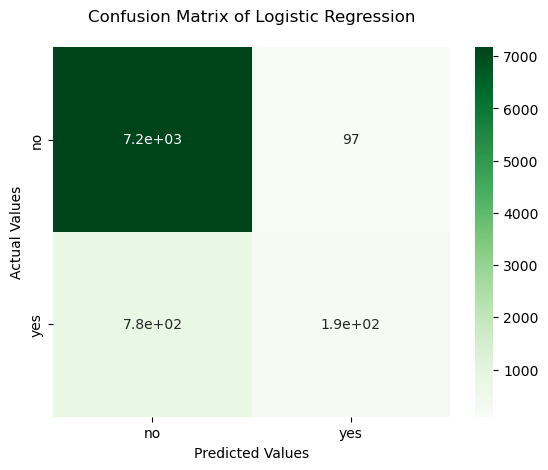

In [77]:
cm = confusion_matrix(y_test,y_pred)
print(cm)  ## print confusion matrix
sns.heatmap(cm,annot=True,cmap='Greens',xticklabels=['no','yes'],yticklabels=['no','yes'])  ## graphically show confusion matrix
plt.title('Confusion Matrix of Logistic Regression\n')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [67]:
print(classification_report(y_pred,y_test))  ## show classification report of this project

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      7951
           1       0.20      0.66      0.30       287

    accuracy                           0.89      8238
   macro avg       0.59      0.78      0.62      8238
weighted avg       0.96      0.89      0.92      8238



In [68]:
## Now next we will work on predict output form new user 

df4 = df3.drop(['euribor3m','nr.employed'],axis=1)  

In [69]:
df4.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4


In [70]:
df4.shape

(41188, 17)

In [71]:
import numpy as np

In [73]:
## prediction for new user input

## take input from user

b = []
for i in range(0,17):
    if df4.columns[i] in df4.select_dtypes(include='object').columns :
        n = input(f'Enter {df4.columns[i]} : ').strip()
    elif df4.columns[i] in df4.select_dtypes(include='int64').columns:
        n = int(input(f'Enter {df4.columns[i]} : ').strip())
    elif df4.columns[i] in df4.select_dtypes(include='float64').columns:
        n = float(input(f'Enter {df4.columns[i]} : ').strip())
    b.append(n)

print(b)  ## show user input

new = np.array(b, dtype=object).reshape(1, -1)  ## convert to array and change row vector to column vector

print(new) ## show new reshape user input

## convert categorical to numerical for labeling data using label encoder
new[0,1] = le_j.transform([new[0,1]])[0]
new[0,2] = le_m.transform([new[0,2]])[0]
new[0,4] = le_d.transform([new[0,4]])[0]
new[0,5] = le_h.transform([new[0,5]])[0]
new[0,6] = le_l.transform([new[0,6]])[0]
new[0,7] = le_c.transform([new[0,7]])[0]
new[0,13] = le_p.transform([new[0,13]])[0]

## convert categorical to numerical for order data using Ordinal encoder

new[0,3] = oe_e.transform([[new[0,3]]])[0][0]
new[0,8] = oe_m.transform([[new[0,8]]])[0][0]
new[0,9] = oe_d.transform([[new[0,9]]])[0][0]

## scaling continuous column data using scaling

new[:, [0,10,11,14,15,16]] = scaler.transform(new[:, [0,10,11,14,15,16]])


## print(new)  ## after scaling show the data


prediction = lr.predict(new) 
print(prediction)  ## show prediction the output

Enter age : 56
Enter job : housemaid
Enter marital : married
Enter education : basic.4y
Enter default : no
Enter housing : no
Enter loan : no
Enter contact : telephone
Enter month : may
Enter day_of_week : mon
Enter campaign : 1
Enter pdays : 999
Enter previous : 0
Enter poutcome : nonexistent
Enter emp.var.rate : 1.1
Enter cons.price.idx : 93.994
Enter cons.conf.idx : -36.4
[56, 'housemaid', 'married', 'basic.4y', 'no', 'no', 'no', 'telephone', 'may', 'mon', 1, 999, 0, 'nonexistent', 1.1, 93.994, -36.4]
[[56 'housemaid' 'married' 'basic.4y' 'no' 'no' 'no' 'telephone' 'may'
  'mon' 1 999 0 'nonexistent' 1.1 93.994 -36.4]]
[0]


C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegressio

In [ ]:
## conclusion 

'''

1. Data Imbalance : 
                In this dataset, yes has 89% and no has 11% in the output column .So, the data is highly imbalance . 

2.Hyperparameter Tunning :
                If we can tune hypermeter then may be come to the better accuracy

3.Better non linear model :
                For non linear model we can use for better accuracy Random forest or Xgboost or catboost.
                Because this model (Random forest or Xgboost or catboost ) capture complex relationships


'''